# Evaluating Utility of Dx Model

```{contents}
```

We have shown that it is possible to predict all clinical subtypes of AML with translatable accuracy using our DNA methylation model. However, an important question arises:

- When would a DNA methylation-based model offer an advantage over current standard of care? 

`MethylScoreAML Dx` is recommended in the following scenarios:
1. For patients with complex karyotype, in which the genomic integrity is so highly compromised that it is unclear what alterations are driving the cancerous phenotype. 
2. For patients with normal karyotype or rare recurring translocations, in which the genomic integrity is intact but the driver alterations are not known/hidden.
3. For patients whose standard of care diagnostic techniques are inconclusive or ambiguous.

`MethylScoreAML Dx` is not recommended in the following scenarios:
1. For patients with a clear, actionable diagnosis based on standard of care assays. In these cases, such as inv(16) and t(8;21), a DNA methylation-based model may not add any additional information.

## Load and preprocess data

In [1]:
import pandas as pd
import numpy as np
from source.data_visualization_functions import draw_sankey_plot, get_custom_color_palette

colors = get_custom_color_palette()

input_path = '../Data/Processed_Data/'
clinical_data_path = '../Data/Intermediate_Files/'

# # read df_discovery and df_validation
# df_discovery = pd.read_pickle(
#     input_path+'df_discovery.pkl').sort_index()

# df_validation = pd.read_pickle(
#     input_path+'df_validation.pkl').sort_index()

# Load clinical data
discovery_clinical_data = pd.read_csv(clinical_data_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

validation_clinical_data = pd.read_csv(clinical_data_path+'validation_clinical_data.csv',
                                        low_memory=False, index_col=0)

# Load pacmap output data
df = pd.read_csv(input_path+'classifier_output/pacmap_5d_output_acute_leukemia_with_predictions.csv', index_col=0)

# drop the samples with missing labels for the ELN AML 2022 Diagnosis
df_original = df.copy()
# Handling NaN values
df = df.fillna('Unknown')

# join discovery clinical data with pacmap output
discovery_sankey = df_original[['Clinical Trial', 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions','Hematopoietic Lineage']]\
    .join(discovery_clinical_data[['FAB','Primary Cytogenetic Code', 'Risk Group', 'Gene Fusion']], how='right')
supervised_discovery_sankey = discovery_sankey[~discovery_sankey['ELN AML 2022 Diagnosis'].isna()]

# join validation clinical data with pacmap output
validation_sankey = df_original[['Clinical Trial', 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions','Hematopoietic Lineage']]\
    .join(validation_clinical_data[['FAB','Primary Cytogenetic Code', 'Risk Group']], how='right')
supervised_validation_sankey = validation_sankey[~validation_sankey['ELN AML 2022 Diagnosis'].isna()]

print('Data loaded and filtered successfully.')

Data loaded and filtered successfully.


## Comparing ELN AML 2022 Dx with MethylScoreAML Dx

```{note}
Sankey plots below show the distribution of predicted subtypes per each cytogenetic group. The width of the lines is proportional to the number of patients in each group.
```

### Overall study population

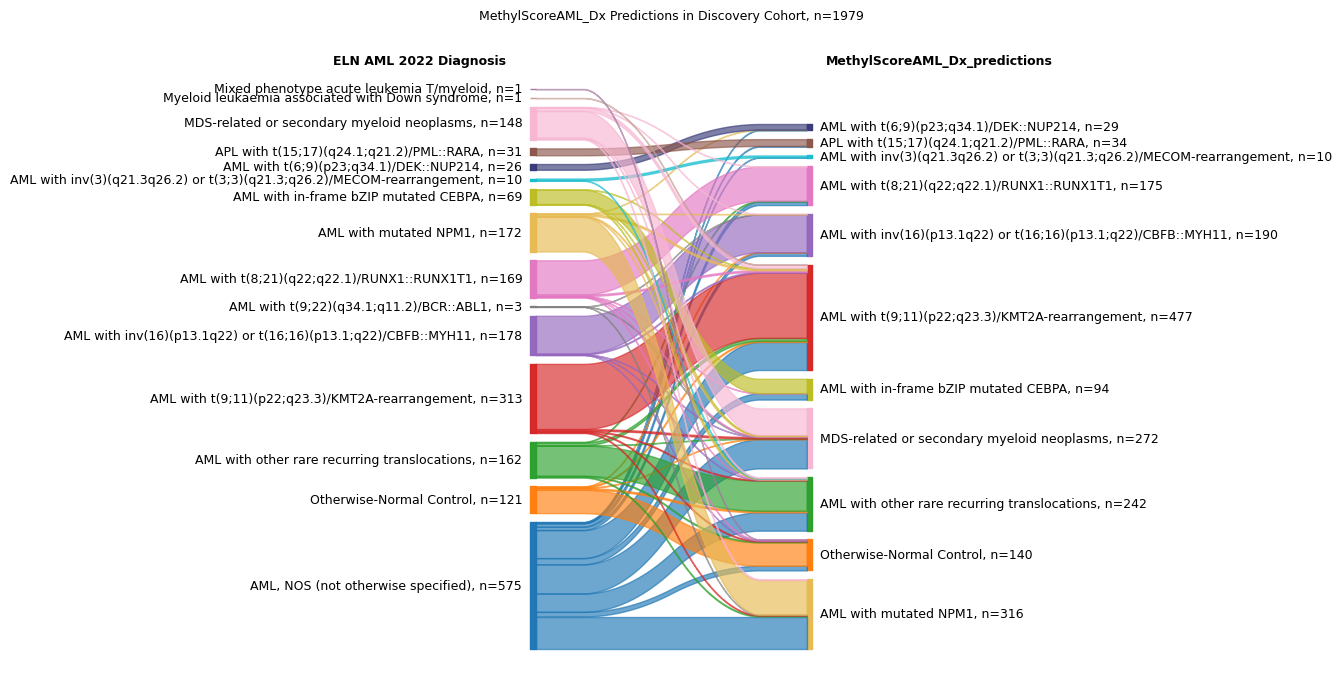

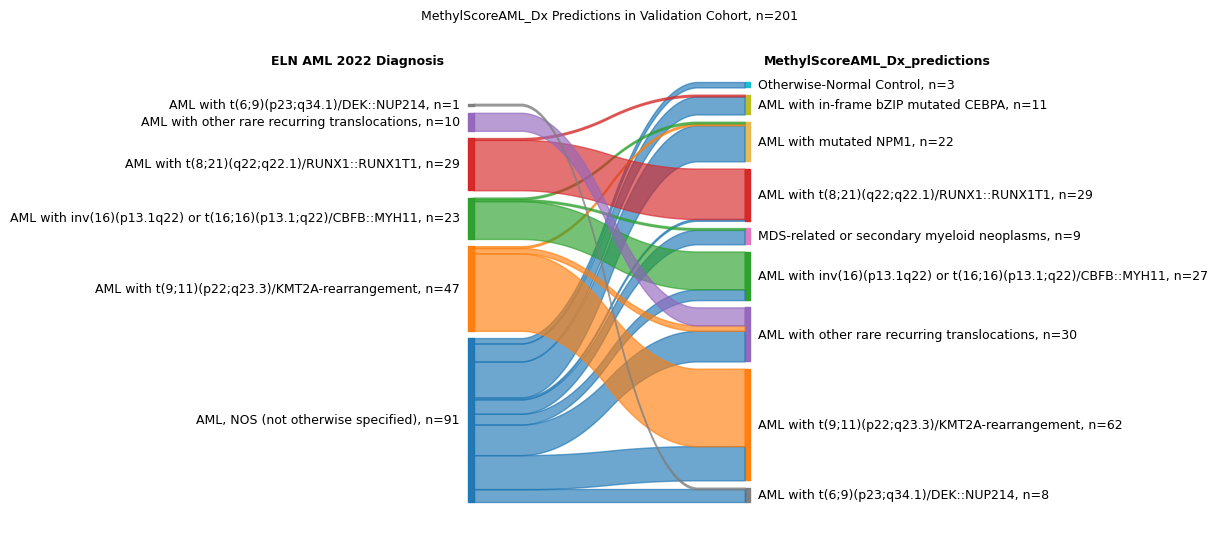

In [14]:

draw_sankey_plot(supervised_discovery_sankey, 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions', colors,
                 title='MethylScoreAML_Dx Predictions in Discovery Cohort', fig_size=(4, 8), fontsize=9)


draw_sankey_plot(supervised_validation_sankey, 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions', colors,
                 title= 'MethylScoreAML_Dx Predictions in Validation Cohort',fig_size=(4, 6), fontsize=9)


### COG trials only

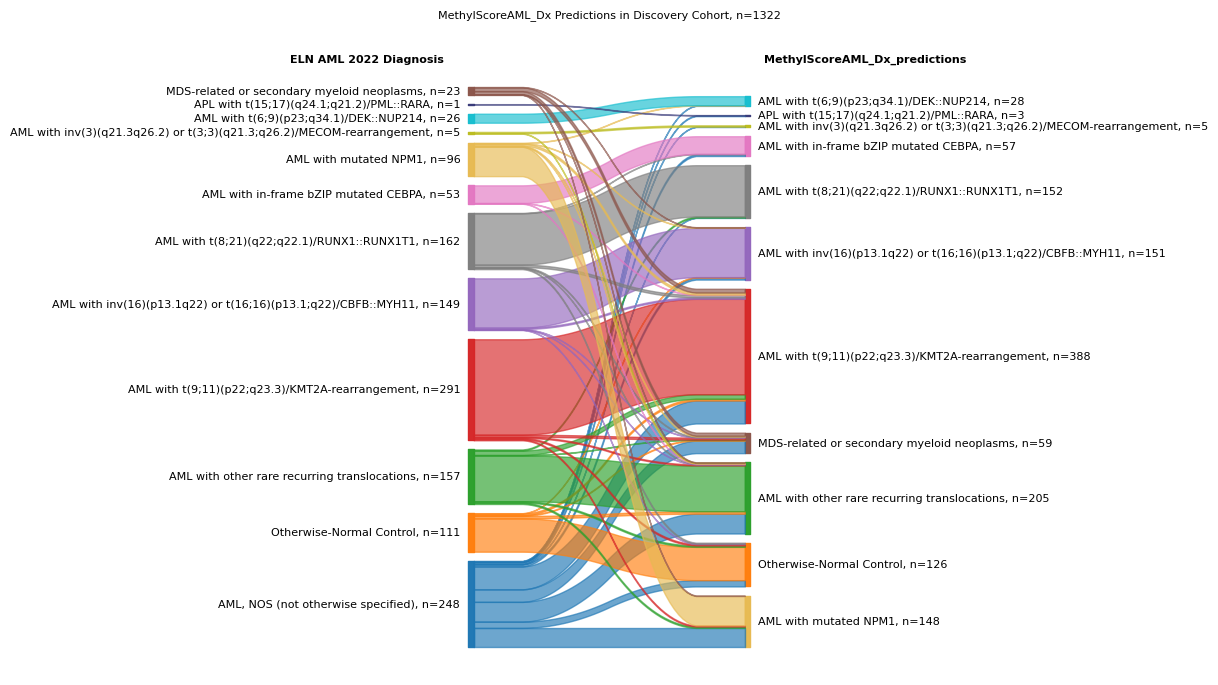

In [12]:
cog_trials_only = discovery_sankey[discovery_sankey['Clinical Trial'].isin(['AAML1031', 'AAML0531', 'AAML03P1', 'CCG2961'])]

draw_sankey_plot(cog_trials_only, 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions', colors,
                 title='MethylScoreAML_Dx Predictions in Discovery Cohort', fig_size=(4, 8), fontsize=8)


### AML NOS only

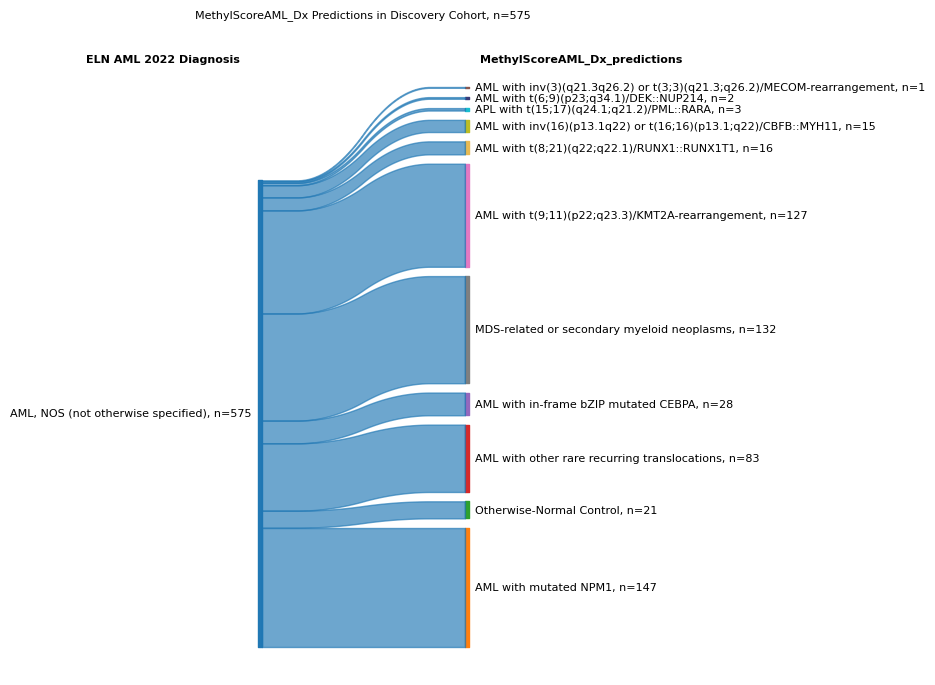

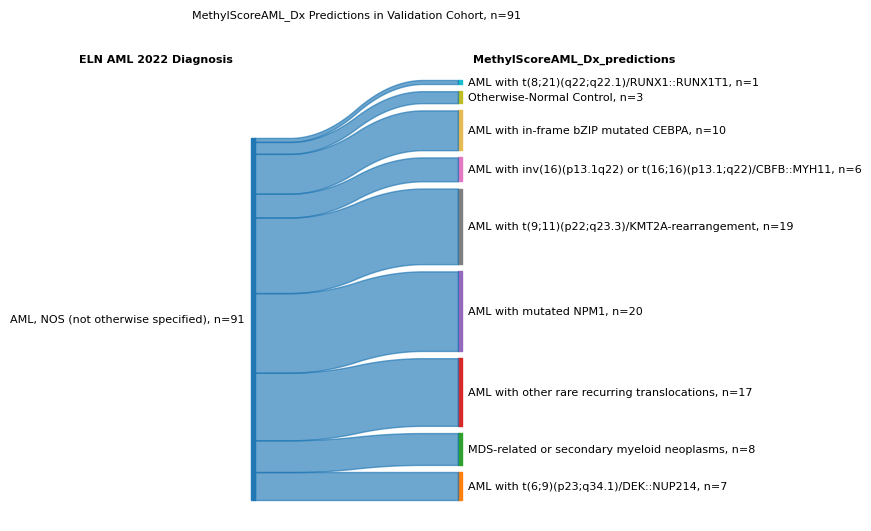

In [5]:
draw_sankey_plot(aml_only_trials[aml_only_trials['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions', colors,
                 title='MethylScoreAML_Dx Predictions in Discovery Cohort', fig_size=(3, 8), fontsize=8)


draw_sankey_plot(validation_sankey[validation_sankey['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'MethylScoreAML_Dx_predictions', colors,
                 title= 'MethylScoreAML_Dx Predictions in Validation Cohort', fig_size=(3, 6), fontsize=8)

## Where do the AML unspecified samples come from?

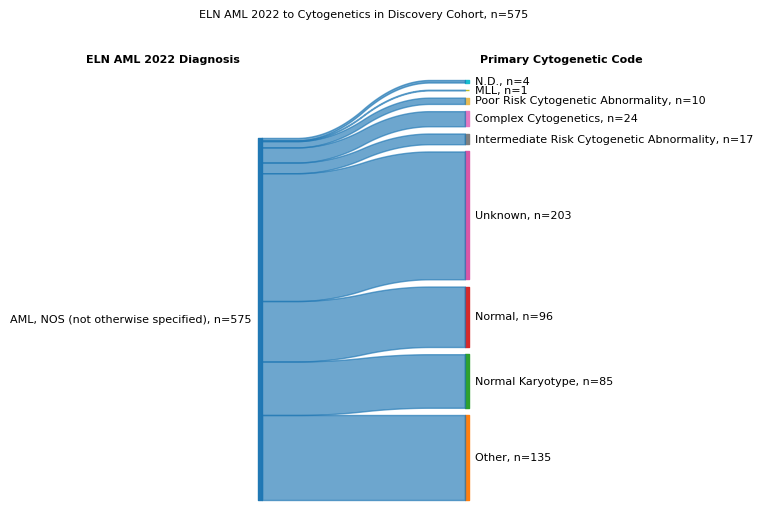

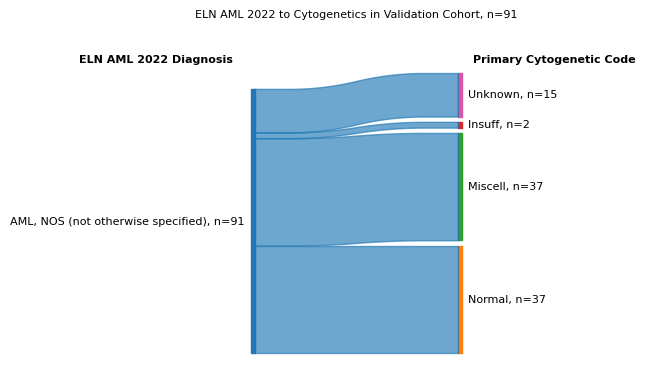

In [15]:
draw_sankey_plot(aml_only_trials[aml_only_trials['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Primary Cytogenetic Code', colors,
                 title='ELN AML 2022 to Cytogenetics in Discovery Cohort', fig_size=(3, 6), fontsize=8)


draw_sankey_plot(validation_sankey[validation_sankey['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Primary Cytogenetic Code', colors,
                 title= 'ELN AML 2022 to Cytogenetics in Validation Cohort', fig_size=(3, 4), fontsize=8)

### Unspecified samples by clinical trial in discovery cohort

In [6]:
# Select only rows in which AML diagnosis is unknown
aml_only_trials[aml_only_trials['ELN AML 2022 Diagnosis'].isna()]['Clinical Trial'].value_counts(dropna=False)

Clinical Trial
TCGA AML               140
AAML0531               132
Beat AML Consortium    132
AAML1031                94
Japanese AML05          55
AAML03P1                12
CCG2961                 10
Name: count, dtype: int64

### Unspecified samples from COG trials only

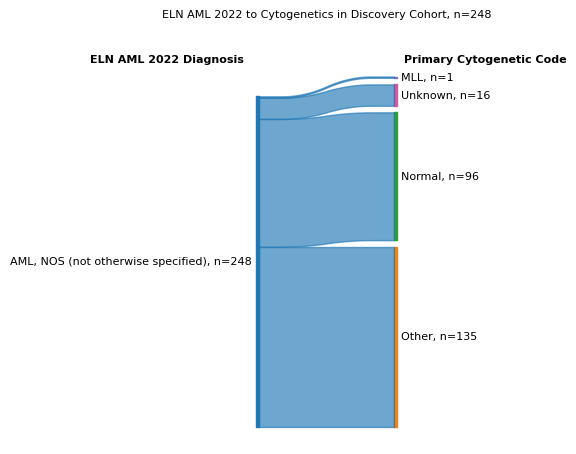

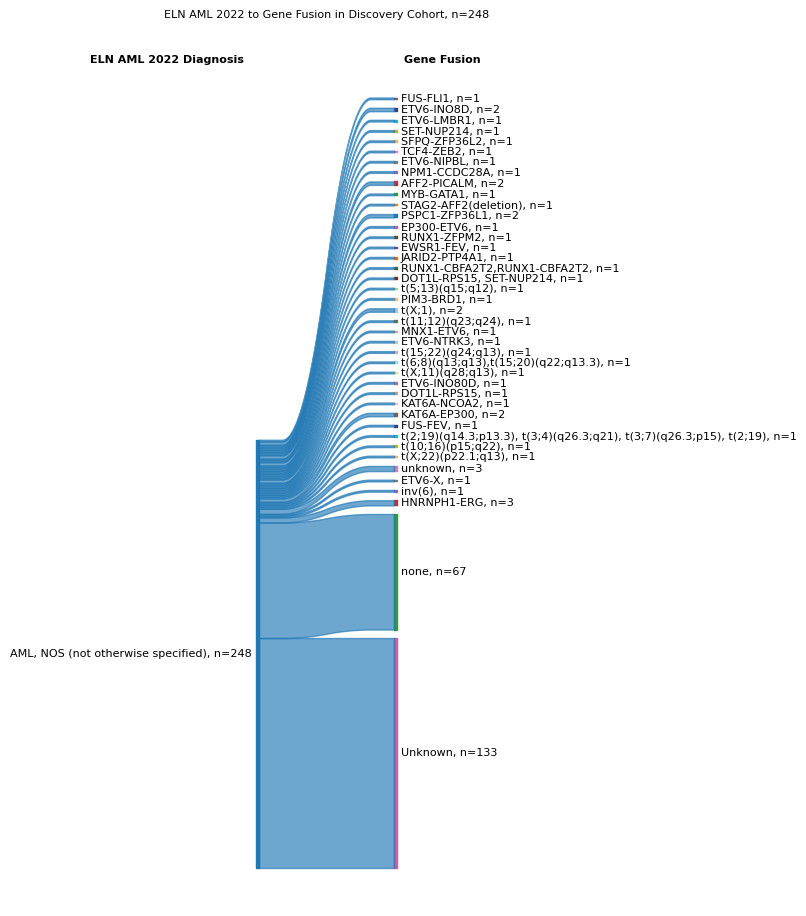

In [16]:
aml_only_trials_COG = aml_only_trials[aml_only_trials['Clinical Trial'].isin(['AAML1031', 'AAML0531', 'AAML03P1', 'CCG2961'])]
draw_sankey_plot(aml_only_trials_COG[aml_only_trials['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Primary Cytogenetic Code', colors,
                 title='ELN AML 2022 to Cytogenetics in Discovery Cohort', fig_size=(2, 5), fontsize=8)

aml_only_trials_COG = aml_only_trials[aml_only_trials['Clinical Trial'].isin(['AAML1031', 'AAML0531', 'AAML03P1', 'CCG2961'])]
draw_sankey_plot(aml_only_trials_COG[aml_only_trials['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Gene Fusion', colors,
                 title='ELN AML 2022 to Gene Fusion in Discovery Cohort', fig_size=(2, 11), fontsize=8)

### Unspecified samples to risk group

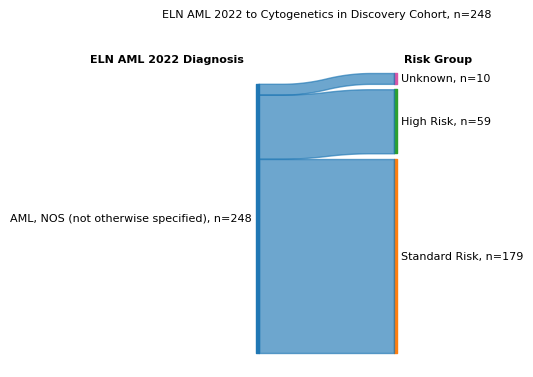

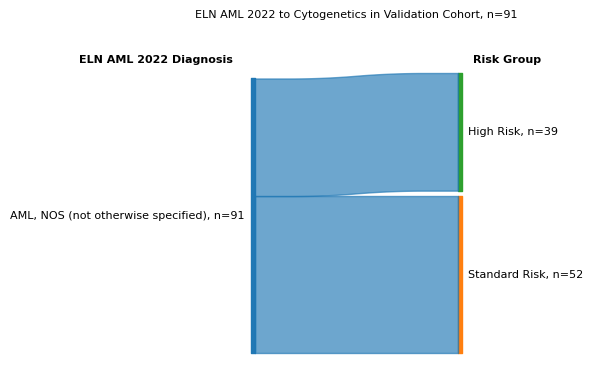

In [21]:
aml_only_trials_COG = aml_only_trials[aml_only_trials['Clinical Trial'].isin(['AAML1031', 'AAML0531', 'AAML03P1', 'CCG2961'])]
draw_sankey_plot(aml_only_trials_COG[aml_only_trials['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Risk Group', colors,
                 title='ELN AML 2022 to Cytogenetics in Discovery Cohort', fig_size=(2, 4), fontsize=8)

draw_sankey_plot(validation_sankey[validation_sankey['ELN AML 2022 Diagnosis'].isin(['AML, NOS (not otherwise specified)'])], 'ELN AML 2022 Diagnosis', 'Risk Group', colors,
                 title= 'ELN AML 2022 to Cytogenetics in Validation Cohort', fig_size=(3, 4), fontsize=8)

## MethylScoreAML Dx in St. Jude AML02 by Cytogenetic Groups

In [18]:
validation_sankey['Primary Cytogenetic Code'].value_counts()

Primary Cytogenetic Code
Miscell     43
Normal      40
11q23       22
inv (16)    19
t (8;21)    19
t (9;11)    13
Insuff       3
Name: count, dtype: int64

### Per cytogenetic group

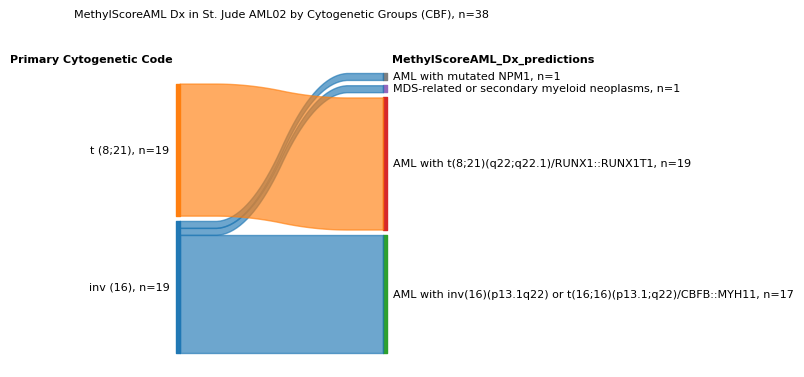

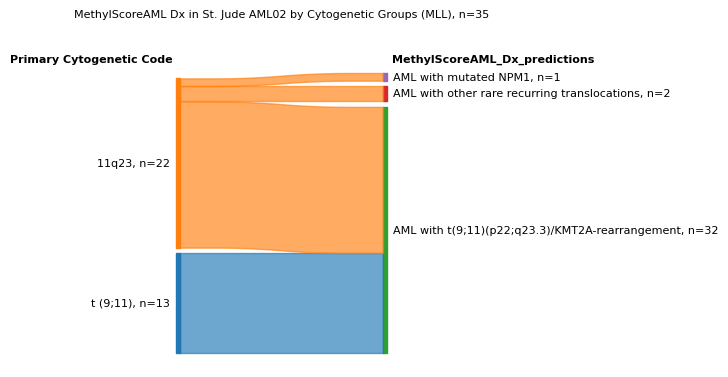

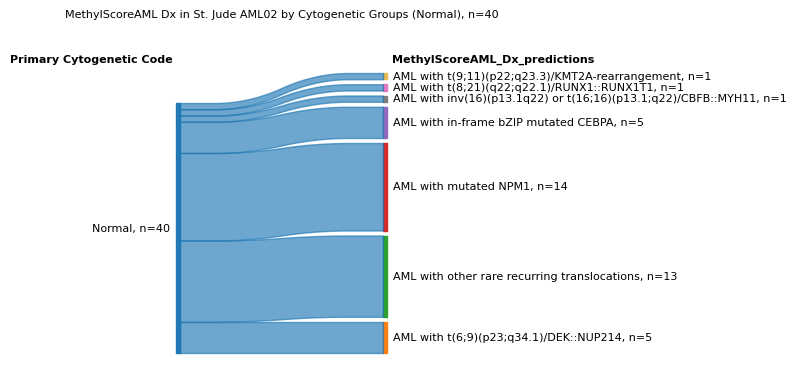

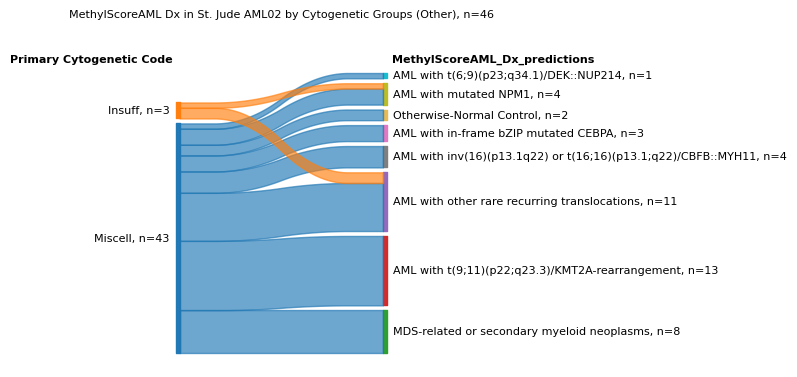

In [19]:
cytogenetic_codes = {
    'CBF': ['t (8;21)', 'inv (16)'],
    'MLL': ['t (9;11)', '11q23'],
    'Normal': ['Normal'],
    'Other': ['Miscell','Insuff']
}

fig_size = (3, 4)
fontsize = 8
column_title_pos = (0.15,0.88)

for group, codes in cytogenetic_codes.items():
    data = validation_sankey[validation_sankey['Primary Cytogenetic Code'].isin(codes)]
    title = f"MethylScoreAML Dx in St. Jude AML02 by Cytogenetic Groups ({group})"

    draw_sankey_plot(data, 'Primary Cytogenetic Code', 'MethylScoreAML_Dx_predictions',
                     colors, title=title, fig_size=fig_size, fontsize=fontsize,
                     column_title=True, column_title_pos = column_title_pos)


### Overall trial population

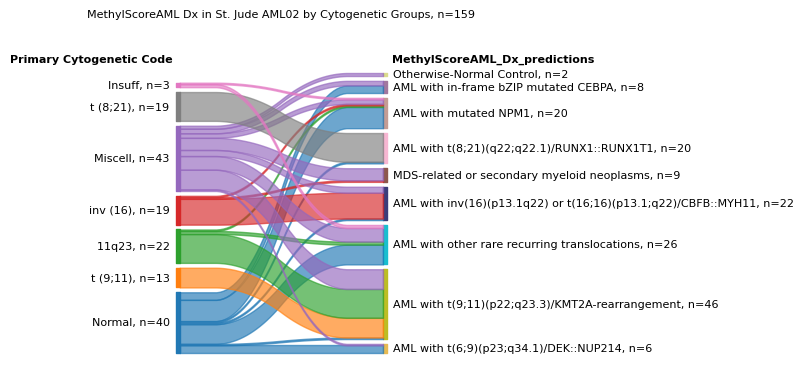

In [20]:
import numpy as np
data = validation_sankey[~validation_sankey['Primary Cytogenetic Code'].isna()]
title = f"MethylScoreAML Dx in St. Jude AML02 by Cytogenetic Groups"

draw_sankey_plot(data, 'Primary Cytogenetic Code', 'MethylScoreAML_Dx_predictions',
                    colors, title=title, fig_size=fig_size, fontsize=fontsize,
                    column_title=True, column_title_pos = column_title_pos)

## MethylScoreAML Dx in validation cohort by risk groups

In [15]:
validation_sankey['Risk Group'].value_counts()

Risk Group
Standard Risk    87
Low Risk         63
High Risk        51
Name: count, dtype: int64

### Per category

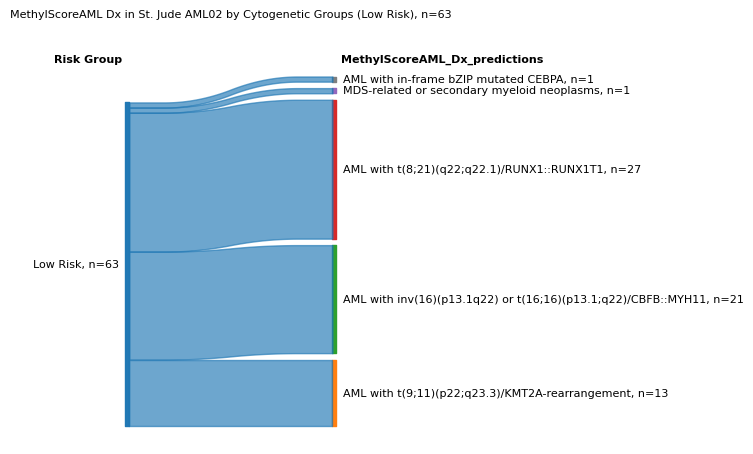

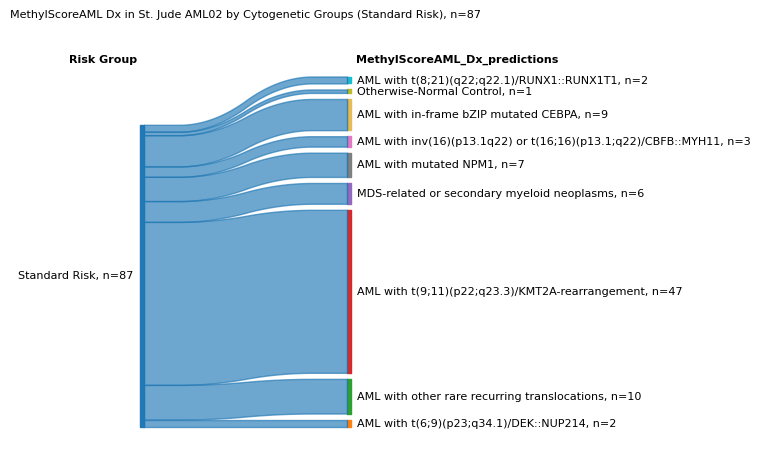

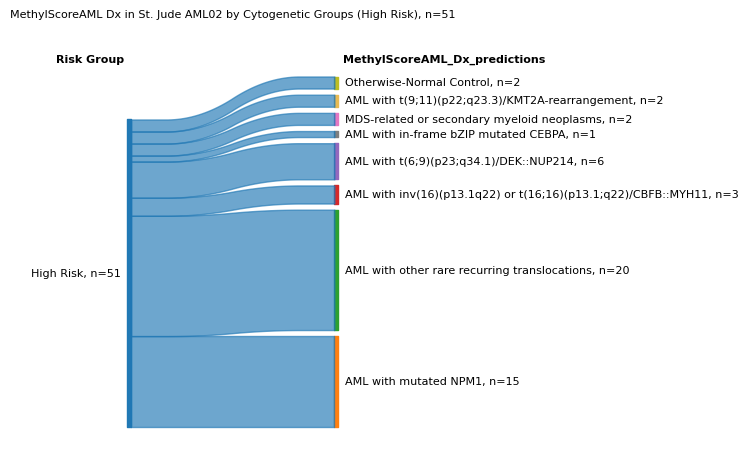

In [44]:
from source.data_visualization_functions import *
import pandas as pd

colors = get_custom_color_palette()

cytogenetic_codes = {
    'Low Risk': ['Low Risk'],
    'Standard Risk': ['Standard Risk'],
    'High Risk': ['High Risk'],
}

fig_size = (3,5)
fontsize = 8
column_title_pos = (0.15,0.88)

for group, codes in cytogenetic_codes.items():
    data = validation_sankey[validation_sankey['Risk Group'].isin(codes)]
    title = f"MethylScoreAML Dx in St. Jude AML02 by Cytogenetic Groups ({group})"

    draw_sankey_plot(data, 'Risk Group', 'MethylScoreAML_Dx_predictions',
                     colors, title=title, fig_size=fig_size, fontsize=fontsize,
                     column_title=True, column_title_pos = column_title_pos)

### All categories

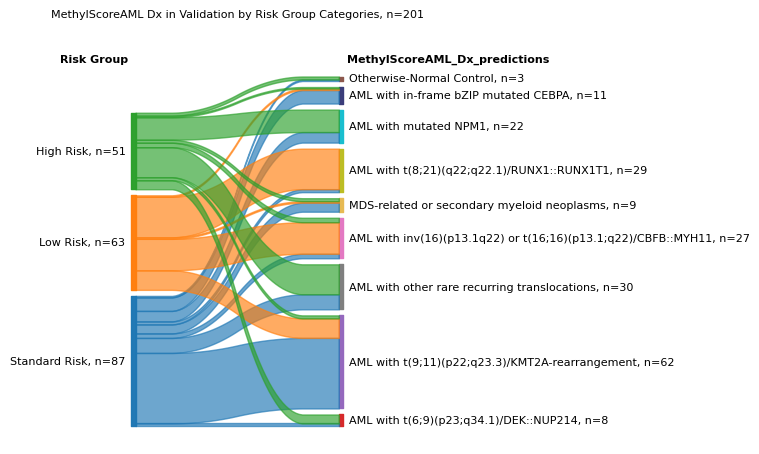

In [45]:
data = validation_sankey[~validation_sankey['Risk Group'].isna()]
title = f"MethylScoreAML Dx in Validation by Risk Group Categories"

draw_sankey_plot(data, 'Risk Group', 'MethylScoreAML_Dx_predictions',
                    colors, title=title, fig_size=fig_size, fontsize=fontsize,
                    column_title=True, column_title_pos = column_title_pos)

## MethylScoreAML Dx in validation cohort by FAB

In [18]:
validation_sankey['FAB'].value_counts()

FAB
M5    43
M4    43
M1    23
M2    21
M7    11
M0     4
M6     1
Name: count, dtype: int64

### All categories

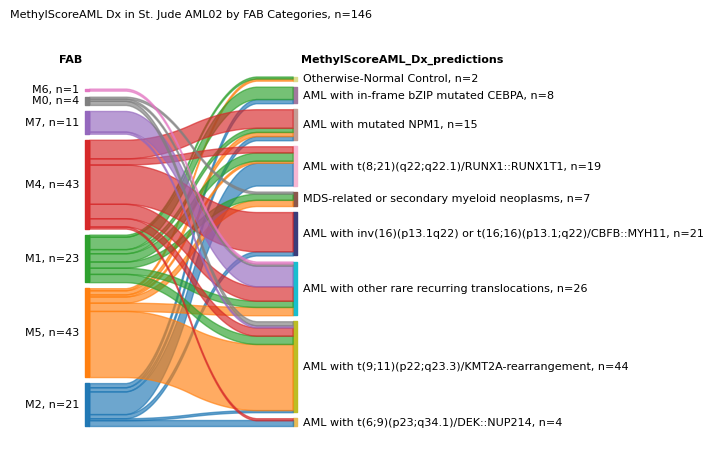

In [46]:
data = validation_sankey[~validation_sankey['FAB'].isna()]
title = f"MethylScoreAML Dx in St. Jude AML02 by FAB Categories"

draw_sankey_plot(data, 'FAB', 'MethylScoreAML_Dx_predictions',
                    colors, title=title, fig_size=fig_size, fontsize=fontsize,
                    column_title=True, column_title_pos = column_title_pos)

## Watermark

In [20]:
# Add watermark with all packages used
get_ipython().run_line_magic('load_ext', 'watermark')

In [21]:
get_ipython().run_line_magic('watermark', '-v -m -p pandas,pySankey,matplotlib -a Francisco_Marchi@Lamba_Lab_UF')

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

pandas    : 2.0.2
pySankey  : 0.0.1
matplotlib: 3.7.1

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.90.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

